<a href="https://www.kaggle.com/code/rakeshrk07/eda-wallmart-sale-analysis?scriptVersionId=163316300" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/walmart-sales/Walmart_sales.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df=pd.read_csv('/kaggle/input/walmart-sales/Walmart_sales.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.Store.value_counts()

Store
1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: count, dtype: int64

The provided data is cleaned and uniformly distributed across these all Stores

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [10]:
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [11]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig = px.line(df, x="Date", y="Weekly_Sales", color='Store',title="Weekly Sales of All Stores Over Time")
fig.show(render='iframe')

#### Observation-
There are certain days in a year when sales are exceptionally high, often occurring in the last week of December, which coincides with Christmas. This period typically sees a significant surge in sales.

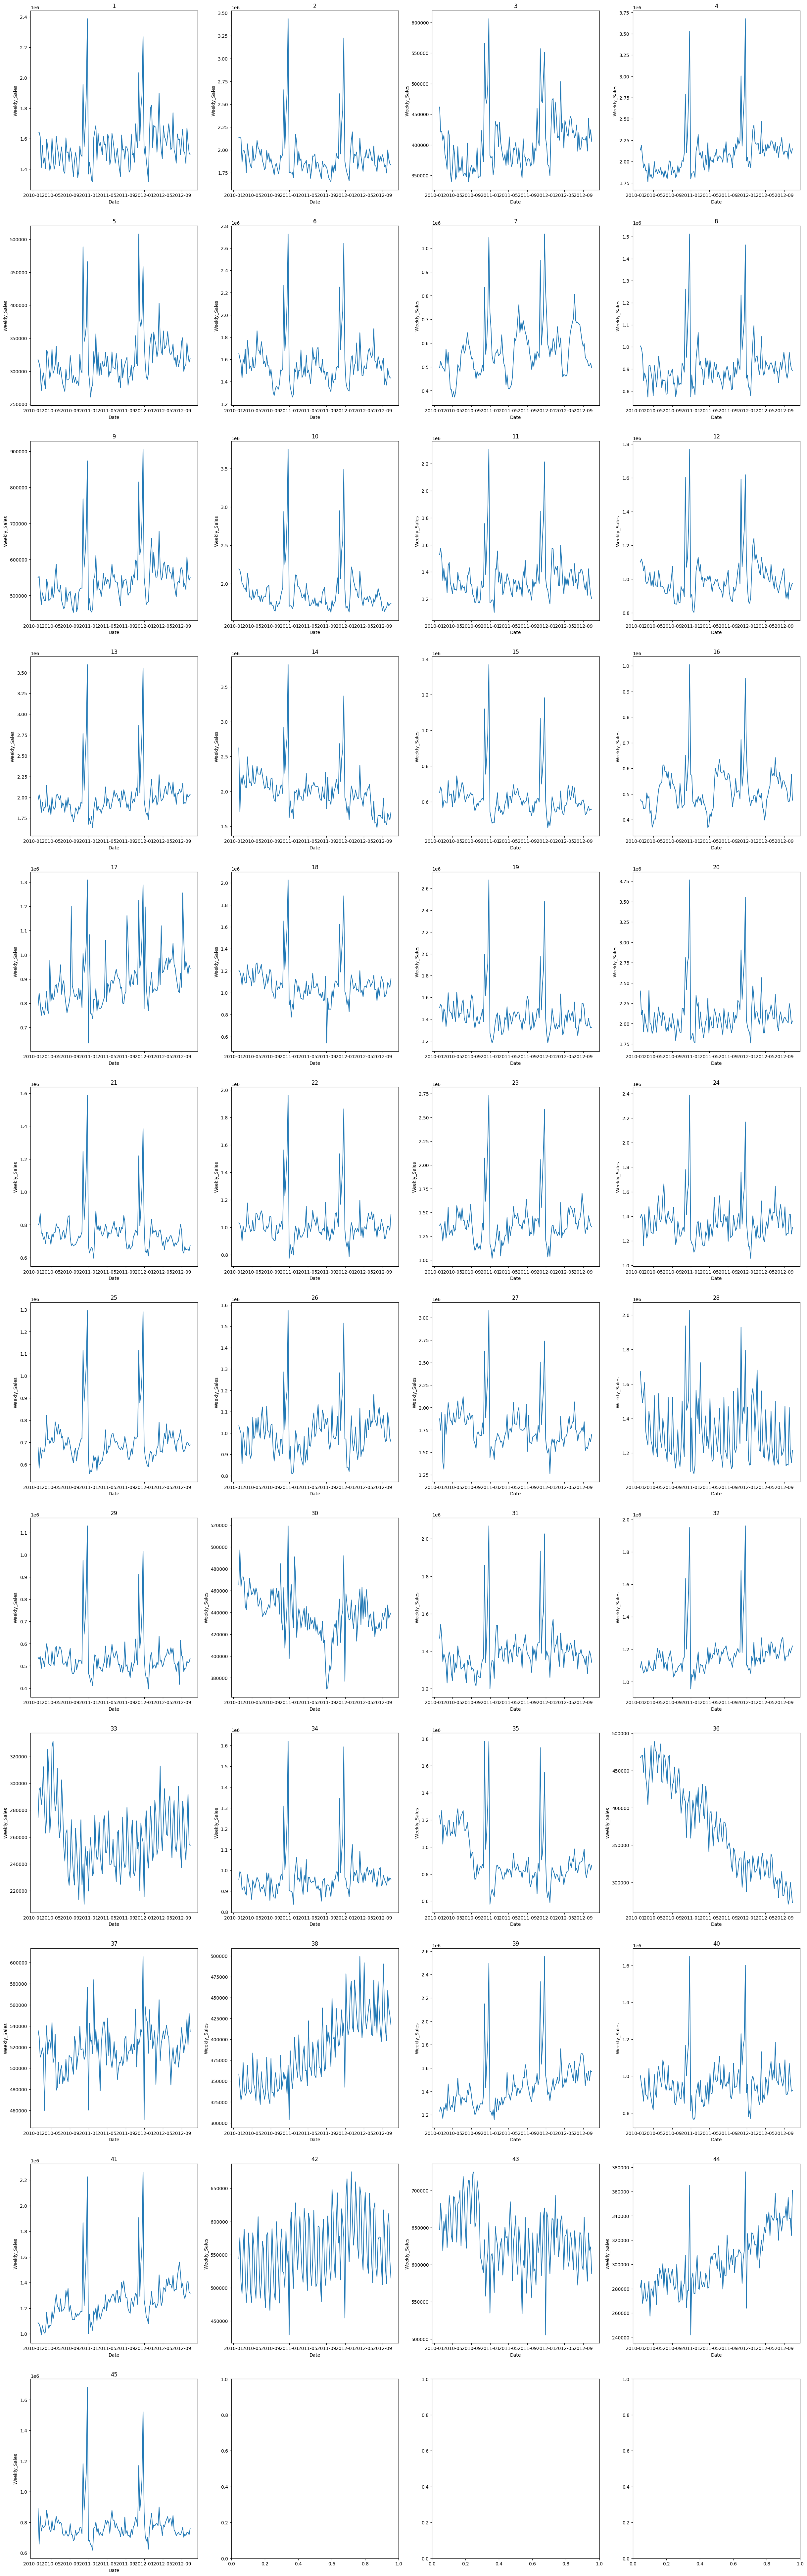

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

fig,axes=plt.subplots(nrows=12 ,ncols=4,figsize=(30,100))
for i in range(0,45):
    temp_df=df[df['Store']==i][['Date','Weekly_Sales']]
    row=i//4
    col=i%4
    sns.lineplot(df[df['Store']==i+1][['Date','Weekly_Sales']],x='Date',y='Weekly_Sales',ax=axes[row,col])
    axes[row,col].set_title(i+1)
    

#### Observation:
The sales patterns across most stores are quite consistent, with notable exceptions. Stores such as #28, #33, #36, #38 #42, and #43 display significant fluctuations in their sales figures. Store #36 demonstrates a consistent decline in sales over time, while store #38 shows a continual increase. 

In [14]:
Store_avg_Sales=df.groupby(by=['Store']).agg({'Weekly_Sales':'mean'}).reset_index().rename(columns={'Weekly_Sales': 'Avg_Weekly_Sales'})
Store_avg_Sales.style.background_gradient(subset='Avg_Weekly_Sales')

,Store,Avg_Weekly_Sales
0,1,1555264.397552
1,2,1925751.335524
2,3,402704.441049
3,4,2094712.960699
4,5,318011.810490
5,6,1564728.186294
6,7,570617.308671
7,8,908749.518392
8,9,543980.552378
9,10,1899424.572657


In [15]:
fig=px.bar(Store_avg_Sales,x='Store',y='Avg_Weekly_Sales',color='Avg_Weekly_Sales',title='Avg weekly Sales of all Stores')
fig.show(render='iframe')

#### Observation
The plot highlights that stores #2, #4, #13, #14, and #20 are the most profitable. In contrast, stores #5, #33, #36, #38, and #44 are less profitable.

In [16]:
Holiday_Flag_avg_sales=df.groupby(by=['Holiday_Flag']).agg({'Weekly_Sales':'mean'}).reset_index().rename(columns={'Weekly_Sales': 'Avg_Weekly_Sales'})
Holiday_Flag_avg_sales

,Holiday_Flag,Avg_Weekly_Sales
0,0,1.041256e+06
1,1,1.122888e+06


In [17]:
Holiday_Flag_total_sales=df.groupby(by=['Holiday_Flag']).agg({'Weekly_Sales':'sum'}).reset_index().rename(columns={'Weekly_Sales': 'Total_Sales'})
Holiday_Flag_total_sales

,Holiday_Flag,Total_Sales
0,0,6.231919e+09
1,1,5.052996e+08


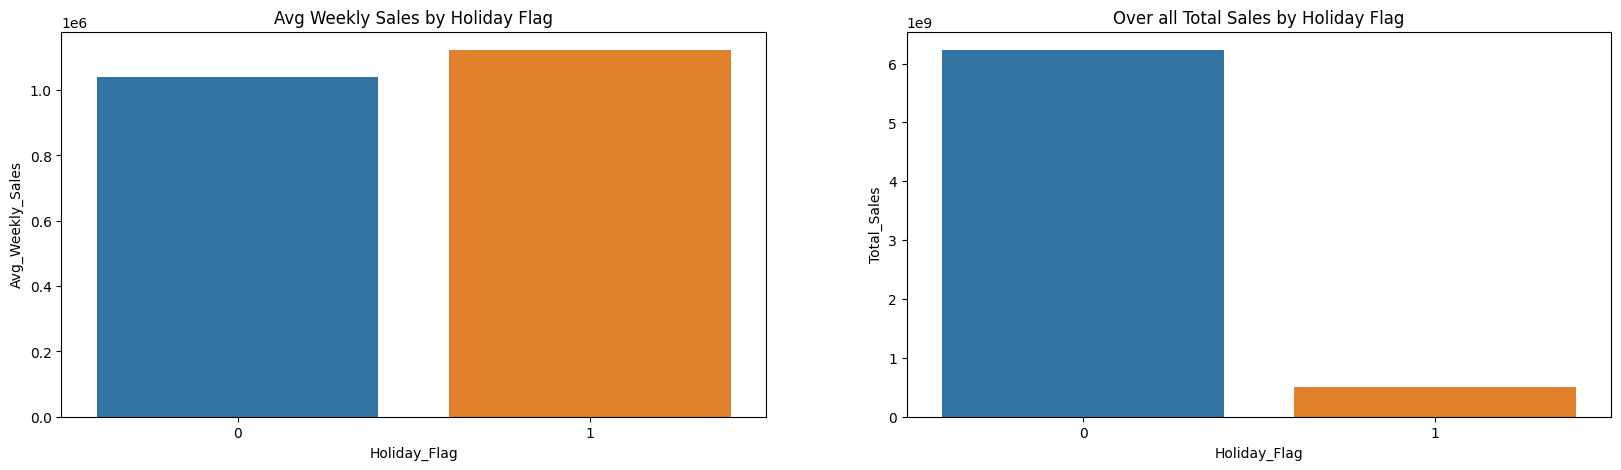

In [18]:
fix,axes=plt.subplots(1,2,figsize=(20,5))
sns.barplot(Holiday_Flag_avg_sales,x='Holiday_Flag',y='Avg_Weekly_Sales',ax=axes[0])
axes[0].set_title('Avg Weekly Sales by Holiday Flag')

sns.barplot(Holiday_Flag_total_sales,x='Holiday_Flag',y='Total_Sales',ax=axes[1])
axes[1].set_title('Over all Total Sales by Holiday Flag')

plt.show()

#### Obseravtion
From the above plot we can see that when there is a holiday the average weekly sales increase. However, over all total sales on holidays are lower due to the limited number of holidays each year, which naturally reduces the overall total.

In [19]:
Top_20_Sales_df=df.sort_values(by='Weekly_Sales',ascending=False).head(20)
Top_20_Sales_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.544590,8.724,2010,12,24
2763,20,2010-12-24,3766687.43,0,25.17,3.141,204.637673,7.484,2010,12,24
1333,10,2010-12-24,3749057.69,0,57.06,3.236,126.983581,9.003,2010,12,24
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143,2011,12,23
1762,13,2010-12-24,3595903.20,0,34.90,2.846,126.983581,7.795,2010,12,24


In [20]:
fig = px.scatter(Top_20_Sales_df, x="Date", y="Weekly_Sales",color='Store',size='Weekly_Sales',title='Top 20 Weekly Sales by Store Over Time')
fig.show(render='iframe')

#### Observation 
From the above plot we can see  that the highest sales spikes in stores occur on December 24, which is Christmas Eve. Additionally, there are noticeable spikes around November 25 and 26 .

In [21]:
Avg_sales_over_time=df.groupby('Date').agg({'Weekly_Sales':'mean'}).reset_index()

In [22]:
fig=px.line(Avg_sales_over_time,x='Date',y='Weekly_Sales',title='Weekly Sales by Store Over Time')
fig.show(render='iframe')

In [23]:
Monthwise_total_sale=df.groupby('month').agg({'Weekly_Sales':'sum'}).reset_index().rename(columns={'Weekly_Sales': 'Total_Monthly_Sales'})
Monthwise_total_sale.style.background_gradient(subset='Total_Monthly_Sales')

,month,Total_Monthly_Sales
0,1,332598438.490000
1,2,568727890.450000
2,3,592785901.280000
3,4,646859784.970000
4,5,557125571.950000
5,6,622629886.840000
6,7,650000977.250000
7,8,613090208.820000
8,9,578761179.260000
9,10,584784787.590000


In [24]:
fig=px.bar(Monthwise_total_sale,x='month',y='Total_Monthly_Sales',color='Total_Monthly_Sales',title='Total_Monthly_Sales')
fig.show(render='iframe')

In [25]:
Monthwise_avg_sale=df.groupby('month').agg({'Weekly_Sales':'mean'}).reset_index().rename(columns={'Weekly_Sales': 'Avg_Monthly_Sales'})
Monthwise_avg_sale.style.background_gradient(subset='Avg_Monthly_Sales')

,month,Avg_Monthly_Sales
0,1,923884.551361
1,2,1053199.797130
2,3,1013309.232957
3,4,1026761.563444
4,5,1031714.022130
5,6,1064324.592889
6,7,1031747.582937
7,8,1048017.450974
8,9,989335.349162
9,10,999632.115538


In [26]:
fig=px.bar(Monthwise_avg_sale,x='month',y='Avg_Monthly_Sales',color='Avg_Monthly_Sales',title='Avg. Sales by month')
fig.show(render='iframe')

#### Observations
From the plots above, it is evident that the average sales per month are highest in December. However, when considering the total sales over the two years, the months with the highest total sales are April and August.

In [27]:
FuelPrice_Over_Time_df=df.groupby('Date').agg({'Fuel_Price':'mean'}).reset_index()
FuelPrice_Over_Time_df['Avg. price']=df.Fuel_Price.mean()
FuelPrice_Over_Time_df

,Date,Fuel_Price,Avg. price
0,2010-02-05,2.717844,3.358607
1,2010-02-12,2.694022,3.358607
2,2010-02-19,2.672067,3.358607
3,2010-02-26,2.683933,3.358607
4,2010-03-05,2.731200,3.358607
...,...,...,...
138,2012-09-28,3.854578,3.358607
139,2012-10-05,3.845222,3.358607
140,2012-10-12,3.896733,3.358607
141,2012-10-19,3.880000,3.358607


In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=FuelPrice_Over_Time_df['Date'], y=FuelPrice_Over_Time_df['Fuel_Price'],
                    mode='lines+markers',
                         name='Price over time'
                    ))
fig.add_trace(go.Scatter(x=FuelPrice_Over_Time_df['Date'], y=FuelPrice_Over_Time_df['Avg. price'],
                    mode='lines',
                    name='Avg. Fuel Price'))
fig.update_layout(title='Fuel Price Over Time',
                   xaxis_title='Date',
                   yaxis_title='Price',
                 )

fig.show(render='iframe')

#### Obseravtion 
From the above plot, we can conclude that fuel prices have been consistently increasing over the years, with the highest prices typically observed in May and April.

In [29]:
CPI_Over_Time_df=df.groupby('Date').agg({'CPI':'mean'}).reset_index()
CPI_Over_Time_df['Avg. CPI']=df.CPI.mean()
CPI_Over_Time_df

,Date,CPI,Avg. CPI
0,2010-02-05,167.730885,171.578394
1,2010-02-12,167.825608,171.578394
2,2010-02-19,167.871686,171.578394
3,2010-02-26,167.909657,171.578394
4,2010-03-05,167.947628,171.578394
...,...,...,...
138,2012-09-28,176.373588,171.578394
139,2012-10-05,176.505052,171.578394
140,2012-10-12,176.636515,171.578394
141,2012-10-19,176.652613,171.578394


In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=CPI_Over_Time_df['Date'], y=CPI_Over_Time_df['CPI'],
                    mode='lines',
                         name='CPI over time'
                    ))
fig.add_trace(go.Scatter(x=CPI_Over_Time_df['Date'], y=CPI_Over_Time_df['Avg. CPI'],
                    mode='lines',
                    name='Avg CPI'))
fig.update_layout(title='CPI Over Time',
                   xaxis_title='Date',
                   yaxis_title='CPI',
                 )

fig.show(render='iframe')

#### Observation 
Here we can see that consumer price index CPI is also increasing over the years

In [31]:
df.groupby('Date').agg({'Unemployment':'mean'}).reset_index()

,Date,Unemployment
0,2010-02-05,8.619311
1,2010-02-12,8.619311
2,2010-02-19,8.619311
3,2010-02-26,8.619311
4,2010-03-05,8.619311
...,...,...
138,2012-09-28,7.237333
139,2012-10-05,6.953711
140,2012-10-12,6.953711
141,2012-10-19,6.953711


In [32]:
fig=px.line(df.groupby('Date').agg({'Unemployment':'mean'}).reset_index(),x='Date',y='Unemployment',title='Unemployment over the years')
fig.show(render='iframe')

<Axes: >

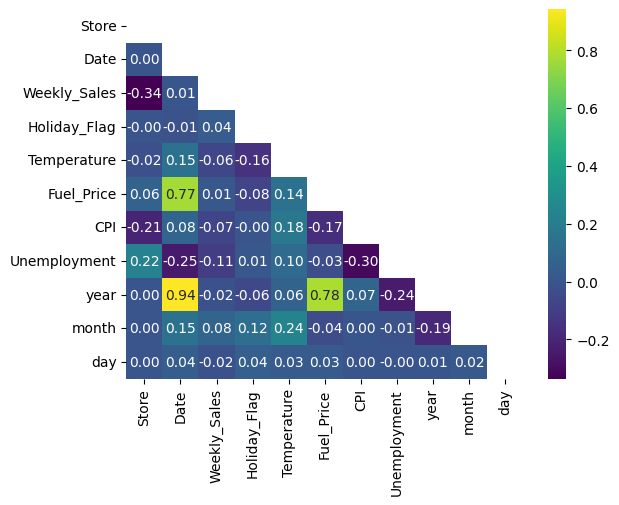

In [33]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='viridis', annot=True, fmt='.2f')

#### ***Please Give Feedback***
# ***Thank You 😊***